# 2. Numpy Arrays.

In [1]:
import numpy as np
from matplotlib import pyplot as plt

In [2]:
r0=range(1000) # Lets make a list from 0 to 999.
f=[x**2 for x in r0] # Lets time the function f=x^2 for x in r0.
f[0:10] # Lets display the first 10 numbers to know we are right.

[0, 1, 4, 9, 16, 25, 36, 49, 64, 81]

In [3]:
%timeit [i**2 for i in r0] # Lets time the function.

306 µs ± 12.2 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [4]:
r0=np.arange(1000) # Numpy arange is the same as "range" for arrays.
f=r0**2 # In numpy r0**2 is itemwise square.
f[0:10] # Prints the first 10 entries to check.

array([ 0,  1,  4,  9, 16, 25, 36, 49, 64, 81])

In [5]:
%timeit r0**2 # Again, lets time this.

1.26 µs ± 30.7 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


## <font color='green'> NOTICE that the numpy array is almost 150 times faster. This is why physics code always uses numpy arrays.</font>

In [6]:
z = np.array([1j, 2+4j, 3], dtype=complex) # You can specify type for the entire array, which is useful.
z

array([0.+1.j, 2.+4.j, 3.+0.j])

In [7]:
z=np.zeros(5)
z

array([0., 0., 0., 0., 0.])

In [8]:
z[-1] # last entry

0.0

In [9]:
z = np.zeros((3,3))
z

array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]])

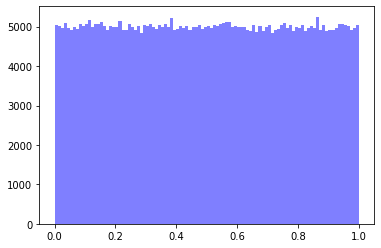

In [10]:
z=np.random.rand(5*10**5,1) # NUMPY has built-in functions for UNIFORM random numbers.
import matplotlib.mlab as mlab
num_bins = 100
n, bins, patches = plt.hist(z, num_bins, facecolor='blue', alpha=0.5) # NOTICE Uniform approximately distribution.

'''

Notice that as you increase the number of random numbers in the array below,
we get more and more closer to the NORMAL distribution.

'''

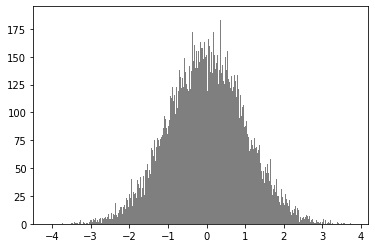

In [11]:
z=np.random.randn(50000,1) # NUMPY has built-in functions for Normal random numbers (notice its randN for normal random)
import matplotlib.mlab as mlab
num_bins = 1000
n, bins, patches = plt.hist(z, num_bins, facecolor='black', alpha=0.5)

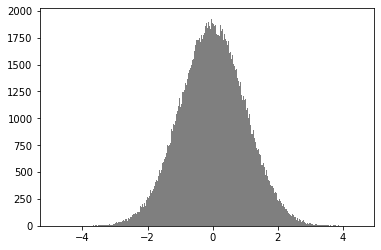

In [12]:
z=np.random.randn(500000,1) # NUMPY has built-in functions for Normal random numbers (notice its randN for normal random)
import matplotlib.mlab as mlab
num_bins = 1000
n, bins, patches = plt.hist(z, num_bins, facecolor='black', alpha=0.5) # More the data points, smoother the Gaussian!!!

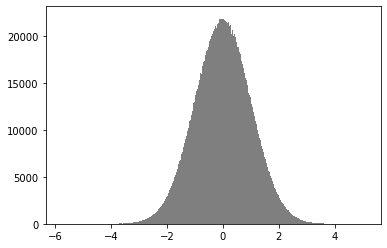

In [13]:
z=np.random.randn(5000000,1) # NUMPY has built-in functions for Normal random numbers (notice its randN for normal random)
import matplotlib.mlab as mlab
num_bins = 1000
n, bins, patches = plt.hist(z, num_bins, facecolor='black', alpha=0.5) # More the data points, smoother the Gaussian!!!

In [14]:
np.random.randn?

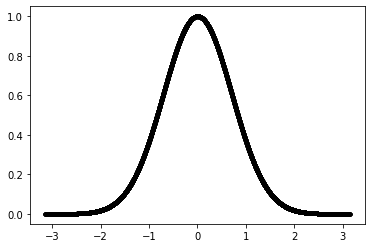

In [15]:
c = np.linspace(-np.pi, np.pi, 10001)   # start, end, num-points
x = np.exp(-c**2)
plt.plot(c,x,'k.-') # Plot a Gaussian just to see!

In [16]:
w = np.ones((2, 2))  
w

array([[1., 1.],
       [1., 1.]])

# Making custom Arrays

In [17]:
a=np.array([1.,2.])
b=np.array([-2.,4.])

In [18]:
np.dot(a,b) # Builtin numpy function

6.0

In [19]:
a.dot(b) # Also an "instance method". This means you can call dot() on a 

6.0

## We can start applying this to physics. Lets do spin-1/2 physics with this

In [20]:
U=np.array([[0,1],[1,0]])
up=np.array([1,0])
down=np.array([0,1])

In [21]:
U.dot(up)

array([0, 1])

In [22]:
U.dot(down)

array([1, 0])

In [23]:
U.dot((up+down)/np.sqrt(2))

array([0.70710678, 0.70710678])

In [24]:
U.dot((up-down)/np.sqrt(2))

array([-0.70710678,  0.70710678])

In [25]:
H=np.kron(np.array([[1,0],[0,-1]]),np.array([[1,0],[0,1]]))+np.kron(np.array([[1,0],[0,1]]),np.array([[1,0],[0,-1]]))+np.array([[1,0,0,0],[0,0,1,0],[0,1,0,0],[0,0,0,1]])

In [26]:
print(np.exp(-1j*np.pi*H/2))

[[-1.8369702e-16+1.j  1.0000000e+00+0.j  1.0000000e+00+0.j
   1.0000000e+00+0.j]
 [ 1.0000000e+00+0.j  1.0000000e+00+0.j  6.1232340e-17-1.j
   1.0000000e+00+0.j]
 [ 1.0000000e+00+0.j  6.1232340e-17-1.j  1.0000000e+00+0.j
   1.0000000e+00+0.j]
 [ 1.0000000e+00+0.j  1.0000000e+00+0.j  1.0000000e+00+0.j
   6.1232340e-17+1.j]]


In [31]:
σ=np.zeros([4,2,2])+1j*np.zeros([4,2,2])
σ[0]=np.eye(2)
σ[1]=np.array([[0,1],[1,0]])
σ[2]=np.array([[0,-1j],[1j,0]])
σ[3]=np.array([[1,0],[0,-1]])

In [40]:
σ1=[np.kron(k,np.eye(2)) for k in σ]
σ2=[np.kron(np.eye(2),k) for k in σ]
O =[np.kron(s1,s2) for s1 in σ for s2 in σ]

In [41]:
σ1[1]

array([[0.+0.j, 0.+0.j, 1.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 0.+0.j, 1.+0.j],
       [1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j]])

In [42]:
σ2[1]

array([[0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j],
       [1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 0.+0.j, 1.+0.j],
       [0.+0.j, 0.+0.j, 1.+0.j, 0.+0.j]])

In [47]:
O[15]

array([[ 1.+0.j,  0.+0.j,  0.+0.j,  0.+0.j],
       [ 0.+0.j, -1.+0.j,  0.+0.j, -0.+0.j],
       [ 0.+0.j,  0.+0.j, -1.+0.j, -0.+0.j],
       [ 0.+0.j, -0.+0.j, -0.+0.j,  1.-0.j]])

# [1] Consider a quantum system initially in the ground state. If the evolution by time dt is given by exp(-i \sigma_x dt) acting on the state, simulate this for e5 timesteps dt=\pi*1e-5

# [2] Generate all possible basis matrices for three-qubits. 

# [3] Generate a code to perform arbitrary real rotations on a unit three-dimensional vector.